In [1]:
import os
import sys
import json
from typing import List, Dict, Optional
import logging
import pymupdf.layout
import pymupdf4llm

In [2]:
print(pymupdf4llm.__version__)

0.2.7


In [3]:
class DocumentLoader:
    def __init__(self):
        self.supported_extensions = ['.pdf']  # We'll add more later
        self.logger = logging.getLogger(__name__)
    
    def load_directory(self, directory_path: str) -> List[Dict]:
        """Load all supported documents from a directory"""
        documents = []
        
        if not os.path.isdir(directory_path):
            self.logger.warning(f"Directory not found: {directory_path}")
            return documents
        
        for filename in os.listdir(directory_path):
            file_path = os.path.join(directory_path, filename)
            
            # Skip directories
            if os.path.isdir(file_path):
                continue
            
            # Check if file extension is supported
            ext = self._get_file_extension(filename)
            if ext not in self.supported_extensions:
                self.logger.debug(f"Skipping unsupported file: {filename}")
                continue
            
            # Load the file based on extension
            try:
                if ext == '.pdf':
                    content = self._load_pdf(file_path)
                    if content:
                        documents.append({
                            'filename': filename,
                            'file_path': file_path,
                            'extension': ext,
                            'content': content
                        })
                # Add more file type handlers here as needed
            except Exception as e:
                self.logger.error(f"Error loading file {filename}: {str(e)}")
                continue
        
        return documents
    
    def _load_pdf(self, file_path: str) -> Optional[str]:
        """Extract text from a PDF file"""
        extraction = pymupdf4llm.to_markdown(file_path, footer=False, header=False)
        return extraction
    
    def _get_file_extension(self, filename: str) -> str:
        """Helper to get lowercase file extension"""
        _, ext = os.path.splitext(filename)
        return ext.lower()

In [5]:
from pathlib import Path
from pix2tex.cli import LatexOCR
from PIL import Image

/home/syedusmani/Documents/Projects/RAG_Assistant/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/syedusmani/Documents/Projects/RAG_Assistant/venv/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.24). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/home/syedusmani/Documents/Projects/RAG_Assistant/venv/lib/python3.10/site-packages/pydantic/_internal/_serializers.py:44: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='noise_params', input_value=UniformParams(noise_type=... 0.0588

In [13]:
pdf_path = Path("/home/syedusmani/Documents/Projects/RAG_Assistant/data/sbchap5.pdf")
output_dir = Path("/home/syedusmani/Documents/Projects/RAG_Assistant/pdf_images")   # where images will be written
output_dir.mkdir(parents=True, exist_ok=True)

In [21]:
md = pymupdf4llm.to_markdown(
    str(pdf_path),
    pages=[8],      
   # image_path="pdf_images",             
    write_images=True,            # actually write image files
    image_format="png",           # or "jpg"
    header=False,            
    footer=False,               
    use_ocr=True,                 # let layout/OCR help if needed
    show_progress=False,
)
print(md)

value function to approach optimality. 

To begin, let us consider a Monte Carlo version of classical policy iteration. In this method, we perform alternating complete steps of policy evaluation and policy improvement, beginning with an arbitrary policy _⇡_ 0 and ending with the optimal policy and optimal action-value function: 


![](/home/syedusmani/Documents/Projects/RAG_Assistant/data/sbchap5.pdf-0009-04.png)


where _−!_ E denotes a complete policy evaluation and _−!_ I denotes a complete policy improvement. Policy evaluation is done exactly as described in the preceding section. Many episodes are experienced, with the approximate actionvalue function approaching the true function asymptotically. For the moment, let us assume that we do indeed observe an infinite number of episodes and that, in addition, the episodes are generated with exploring starts. Under these assumptions, the Monte Carlo methods will compute each _q⇡k_ exactly, for arbitrary _⇡k_ . 

Policy improvement is do

In [49]:
image_path = Path("/home/syedusmani/Documents/Projects/RAG_Assistant/data/sbchap5.pdf-0009-09.png")
img = Image.open(image_path)
model = LatexOCR()
text = model(img)
print(text)

\begin{array}{l l l}{{q_{\pi_{k}}(s,\pi_{k+1}(s))}}&{{=}}&{{q_{\pi_{k}}(s,\arg\mathrm{nx}\,q_{\pi_{k}}(s,a))}}\\ {{}}&{{}}&{{=}}&{{\operatorname*n_{\pi_{k}}(s,\pi_{k}(s,a)}}\\ {{}}&{{}}&{{\geq}}&{{q_{\pi_{k}}(s,a)}}\\ {{}}&{{}}&{{=}}&{{v_{\pi_{k}}(s).}}\end{array}


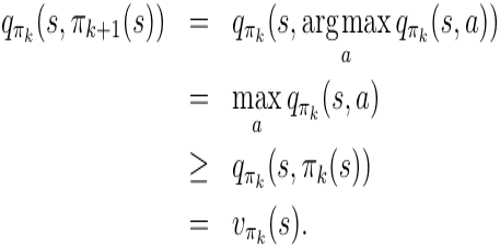

In [48]:
display(img)

In [51]:
md = md.replace('![](' + str(image_path) + ')', text)
print(md)

value function to approach optimality. 

To begin, let us consider a Monte Carlo version of classical policy iteration. In this method, we perform alternating complete steps of policy evaluation and policy improvement, beginning with an arbitrary policy _⇡_ 0 and ending with the optimal policy and optimal action-value function: 


![](/home/syedusmani/Documents/Projects/RAG_Assistant/data/sbchap5.pdf-0009-04.png)


where _−!_ E denotes a complete policy evaluation and _−!_ I denotes a complete policy improvement. Policy evaluation is done exactly as described in the preceding section. Many episodes are experienced, with the approximate actionvalue function approaching the true function asymptotically. For the moment, let us assume that we do indeed observe an infinite number of episodes and that, in addition, the episodes are generated with exploring starts. Under these assumptions, the Monte Carlo methods will compute each _q⇡k_ exactly, for arbitrary _⇡k_ . 

Policy improvement is do